In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

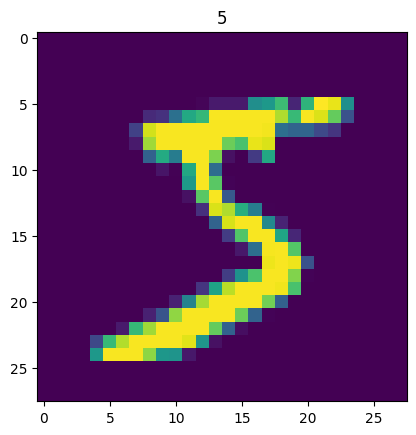

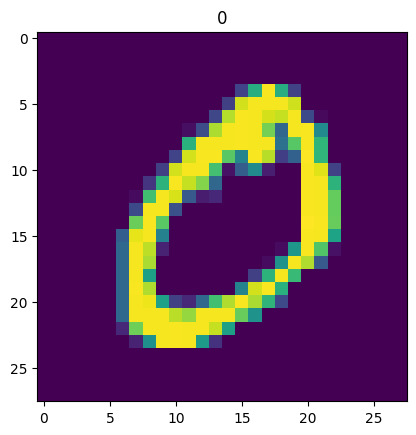

In [7]:
def image_show(train_image,train_label,number):
    plt.imshow(train_image[number])
    plt.title(train_label[number])
    plt.show()
image_show(train_images,train_labels,0)
image_show(train_images,train_labels,1)


In [9]:
# normalisation of data
train_images= train_images/250.0
train_labels=train_labels/250.0
train_images[0:100]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
# dimension expand
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [ ]:
# converting data into categorical value
train_labels=to_categorical(train_labels, num_classes=10)
test_labels=to_categorical(test_labels, num_classes=10)

In [13]:
# model defining
model = models.Sequential()
#                    --> filter --> shape --> activation --> input_shape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history=model.fit(train_images,
                   train_labels,
                     epochs=5, 
                     batch_size=64, 
                     validation_data=(test_images, test_labels),
                     validation_split=0.1,
                     )

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0980 - val_loss: 31303.3477
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0980 - val_loss: 31303.3477
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0980 - val_loss: 31303.3477
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0980 - val_loss: 31303.3477
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0980 - val_loss: 31303.3477


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0924 - loss: 30577.4844
Test accuracy: 0.09799999743700027


In [18]:
#prediction
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [19]:
import joblib
joblib.dump(model, 'Cnn_model.pkl')

['Cnn_model.pkl']